<h1>Watching from above

## Team composition:
* **Fabrice**
* **Ludovica**
* **Luis**
* **Pablo**
* **Rui**

# Notebook preparation 

## Packages
--> Install the necessary packages in the new environment

* pip install tensorflow
* pip install tdqm

## librairies import

In [6]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tqdm import tqdm # to observ the progression
import numpy as np
import os
from PIL import Image

import matplotlib.pyplot as plt

2022-12-07 12:05:36.878476: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 12:05:41.425735: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-07 12:05:41.425849: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-07 12:05:41.797711: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-07 12:05:48.697755: W tensorflow/stream_executor/platform/de

# Data preparation

## Load data 

In [ ]:
#os.getcwd()

In [ ]:
data_path = '../raw_data/EuroSAT'

#classes_name = os.listdir(os.path.join(data_path))

#f'Number of classes : {len(classes_name)} '

## Balance / Unbalance checking 
--> (number images per category)

In [ ]:
# for i in range(len(classes_name)):
#     images_per_cat = os.listdir(os.path.join(data_path, classes_name[i]))
#     print(
#         f'{classes_name[i]} :   {len(images_per_cat)} images'
#         )    

**Dataset already balanced = No action**

## Dataset conversion with labels encoding

In [ ]:
def load_data(data_path:str):
    
    classes = {
            'AnnualCrop':0,
            'Forest':1, 
            'HerbaceousVegetation':2,
            'Highway':3,
            'Industrial':4,
            'Pasture':5,
            'PermanentCrop':6,
            'Residential':7,
            'River':8,
            'SeaLake':9,
            }
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:3000]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                imgs.append(np.array(image))
                labels.append(i)
    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)
    return X,y
    

In [ ]:
def shuffle_data(X,y, seed=None):
    '''
    Shuffle the X and y datas
    if seed is used, it will fix the random
    '''
    if seed != None :
        np.random.seed(seed)
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]
    return X, y

In [ ]:
X, y = load_data(data_path)

Let's check the datas format after loading (and also encoding for y) :

In [ ]:
X, y = shuffle_data(X,y, 0)

In [ ]:
# print("______________Check X________________________")
# print(f'X shape : {X.shape},min X value is : {np.min(X)}, Max X value is : {np.max(X)} ')
# print("______________Check y _______________________")
# print(f'y shape : {y.shape}')

In [ ]:
# k=0
# plt.figure(figsize=(20,15))
# for i in range(len(classes_name)):
#     plt.subplot(1,11, i+1)
#     img = np.squeeze(X[k])
#     plt.imshow(img, cmap='gray')
#     k+=2499
    
#     print(k)


## Train & test split :

In [ ]:
def data_split(X,y,val_perc, test_perc):
    first_split = int(len(X) * test_perc)  
    second_split = first_split + int(len(X) * val_perc)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    #print(f'X_train shape : {X_train.shape},X_val shape : {X_val.shape}, X_test shape : {X_test.shape}')
    #print(f'y_train shape : {y_train.shape},y_val shape : {y_val.shape},  y_test shape : {y_test.shape}')
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = data_split(X,y,0.1,0.1)

## Data scaling checking

In [ ]:
# # Testing whether we need to normalize or not
# f'X_train min = {np.min(X_train)}, X_train Max = {np.max(X_train)}, X_test min = {np.min(X_test)}, X_test Max = {np.max(X_test)}'


**--> Will be done in the model**

# Model

## Dummy model

In [ ]:
# list=[]
# for i in range(len(classes_name)):
#     images_per_cat = os.listdir(os.path.join(data_path, classes_name[i]))
#     list.append((len(images_per_cat)/27000))
#     print(f'{(len(images_per_cat)/27000)} probability of classe {i}')  

In [ ]:
# import numpy as np
# np.mean(list)

##  Basic model

In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def load_basic_model():
    
    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(64,64,3)))
    
    model.add(layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
 
    model.add(layers.Conv2D(32, kernel_size=(2,2), padding='same', activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    #model.add(layers.Conv2D(64, kernel_size=(2,2), padding='same', activation="relu"))
    #model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [ ]:
model_basic = load_basic_model()
#model_basic.summary()

In [ ]:
def fit_model(model, X_train, y_train,X_val, y_val,epochs=100):
    es = EarlyStopping(monitor = 'val_accuracy', 
                    patience = 5, 
                    restore_best_weights = True,
                    verbose = 1, 
                    )

    history = model.fit(X_train, y_train,
                                validation_data = (X_val, y_val),
                                batch_size = 32, 
                                epochs=epochs, 
                                callbacks=[es])
    return history


In [ ]:
history = fit_model(model_basic, X_train, y_train,X_val, y_val,epochs=2)

**Loss & accuracy (train/val):**

In [ ]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Val'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Val'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

In [ ]:
plot_loss_accuracy(history)

**Model evaluation:**

In [ ]:
evaluation = model_basic.evaluate(X_test, y_test)
evaluation

In [ ]:
test_accuracy = evaluation[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

In [ ]:
os.getcwd()

In [ ]:
data_path = '../image_Forest.jpg'

In [ ]:
X_test2 = []
X_test2.append(np.array(Image.open(data_path)))
X_test2=np.array(X_test2)

In [ ]:
X_test2.shape

In [ ]:
pred = model_basic.predict(X_test2)
pred[0][np.argmax(pred)], np.argmax(pred)

In [27]:
from tensorflow.keras import models
model_path = '../models/my_model'
models.save_model(model_basic, model_path)

NameError: name 'model_basic' is not defined

In [29]:
def load_model(model_path) :
    loaded_model = models.load_model(model_path)
    return loaded_model   

In [30]:
loaded_model = load_model(model_path)

2022-12-07 12:21:09.018610: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-07 12:21:09.032100: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-07 12:21:09.032185: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (schneider-1091-fabrice-d-eustachio): /proc/driver/nvidia/version does not exist
2022-12-07 12:21:09.063465: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [59]:
new_images_path =  './new_tiles'


In [81]:
sorted(os.listdir(new_images_path))

['image_000_000.jpg',
 'image_000_001.jpg',
 'image_000_002.jpg',
 'image_000_003.jpg',
 'image_000_004.jpg',
 'image_000_005.jpg',
 'image_000_006.jpg',
 'image_000_007.jpg',
 'image_000_008.jpg',
 'image_000_009.jpg',
 'image_000_010.jpg',
 'image_000_011.jpg',
 'image_000_012.jpg',
 'image_000_013.jpg',
 'image_000_014.jpg',
 'image_000_015.jpg',
 'image_001_000.jpg',
 'image_001_001.jpg',
 'image_001_002.jpg',
 'image_001_003.jpg',
 'image_001_004.jpg',
 'image_001_005.jpg',
 'image_001_006.jpg',
 'image_001_007.jpg',
 'image_001_008.jpg',
 'image_001_009.jpg',
 'image_001_010.jpg',
 'image_001_011.jpg',
 'image_001_012.jpg',
 'image_001_013.jpg',
 'image_001_014.jpg',
 'image_001_015.jpg',
 'image_002_000.jpg',
 'image_002_001.jpg',
 'image_002_002.jpg',
 'image_002_003.jpg',
 'image_002_004.jpg',
 'image_002_005.jpg',
 'image_002_006.jpg',
 'image_002_007.jpg',
 'image_002_008.jpg',
 'image_002_009.jpg',
 'image_002_010.jpg',
 'image_002_011.jpg',
 'image_002_012.jpg',
 'image_00

In [80]:
def get_new_images(new_images_path):
    imgs = []
    images_path = sorted(os.listdir(new_images_path))
    for img in tqdm(images_path):
        path = os.path.join(new_images_path, img)
        #print(path)
        if os.path.exists(path):
            image = Image.open(path)
            imgs.append(np.array(image))
    return np.array(imgs)


In [82]:
X_new = get_new_images(new_images_path)

100%|██████████| 256/256 [00:00<00:00, 3830.10it/s]

./new_tiles/image_000_000.jpg
./new_tiles/image_000_001.jpg
./new_tiles/image_000_002.jpg
./new_tiles/image_000_003.jpg
./new_tiles/image_000_004.jpg
./new_tiles/image_000_005.jpg
./new_tiles/image_000_006.jpg
./new_tiles/image_000_007.jpg
./new_tiles/image_000_008.jpg
./new_tiles/image_000_009.jpg
./new_tiles/image_000_010.jpg
./new_tiles/image_000_011.jpg
./new_tiles/image_000_012.jpg
./new_tiles/image_000_013.jpg
./new_tiles/image_000_014.jpg
./new_tiles/image_000_015.jpg
./new_tiles/image_001_000.jpg
./new_tiles/image_001_001.jpg
./new_tiles/image_001_002.jpg
./new_tiles/image_001_003.jpg
./new_tiles/image_001_004.jpg
./new_tiles/image_001_005.jpg
./new_tiles/image_001_006.jpg
./new_tiles/image_001_007.jpg
./new_tiles/image_001_008.jpg
./new_tiles/image_001_009.jpg
./new_tiles/image_001_010.jpg
./new_tiles/image_001_011.jpg
./new_tiles/image_001_012.jpg
./new_tiles/image_001_013.jpg
./new_tiles/image_001_014.jpg
./new_tiles/image_001_015.jpg
./new_tiles/image_002_000.jpg
./new_tile

In [83]:
def predict_new_images(loaded_model, X_new):
    size = int(X_new.shape[0] ** 0.5)
    y_new = loaded_model.predict(X_new)
    y_pred_class = np.argmax(y_new, axis = 1)
    return y_pred_class.reshape((size, size))


In [84]:
y_pred_class = predict_new_images(loaded_model, X_new)
y_pred_class

8/8 [==============================] - 0s 34ms/step


array([[7, 4, 7, 4, 6, 4, 6, 7, 4, 8, 5, 5, 4, 8, 6, 7],
       [4, 7, 4, 6, 7, 7, 7, 7, 4, 4, 0, 2, 4, 7, 7, 7],
       [7, 7, 7, 4, 7, 7, 6, 7, 7, 7, 4, 4, 4, 4, 7, 4],
       [9, 9, 8, 8, 2, 4, 4, 6, 7, 7, 7, 7, 4, 4, 4, 4],
       [3, 6, 6, 2, 8, 7, 4, 6, 6, 4, 7, 7, 4, 7, 4, 7],
       [1, 8, 2, 2, 2, 3, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7],
       [2, 0, 0, 6, 2, 3, 8, 7, 7, 4, 7, 7, 4, 7, 7, 7],
       [2, 2, 0, 9, 5, 5, 0, 6, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 9, 5, 5, 4, 2, 7, 7, 4, 7, 4, 7, 7, 7, 4, 7],
       [5, 5, 0, 2, 7, 4, 7, 4, 4, 7, 7, 4, 7, 4, 7, 7],
       [5, 0, 2, 2, 7, 7, 7, 4, 4, 4, 7, 4, 7, 7, 7, 7],
       [9, 4, 0, 4, 7, 4, 4, 7, 4, 4, 7, 7, 6, 7, 7, 7],
       [1, 4, 0, 2, 7, 7, 7, 7, 4, 7, 4, 7, 7, 8, 8, 8],
       [4, 0, 4, 2, 7, 7, 4, 7, 7, 4, 7, 7, 4, 3, 8, 5],
       [0, 2, 7, 7, 7, 4, 7, 6, 0, 4, 7, 7, 6, 8, 9, 5],
       [2, 7, 7, 7, 6, 7, 7, 2, 7, 3, 7, 4, 3, 5, 1, 2]])

In [62]:
size

16

In [ ]:
# def plot_sub_images_categories(img, categories):
#     '''
#     Plot the images with the quadrants and correspondent categories
#     '''
#     quads = int(img.height/64)
#     fig, axs = plt.subplots(quads, quads, figsize = (10, 10))
#     for i in range(quads):
#         for j in range(quads):
#             img_quad = img.crop((i*64, j*64, i*64+64, j*64+64))
#             new_filename = os.path.join(new_folder, f'image_{i}_{j}.jpg')           
#             img_quad.save(new_filename)
#             axs[j, i].imshow(img_quad)
#             axs[j, i].text(22, 40, categories[i, j], color = 'red')
#             #axs[i, j].set_title(f'Q: {i}, {j}', fontsize = 5)
#             axs[j, i].axis('off')
#     plt.show()

In [64]:
# X_new.shape

(256, 64, 64, 3)

In [87]:
def plot_classified_images(X_new, y_pred_class):
    size = int(X_new.shape[0] ** 0.5)    
    X_reshaped = X_new.reshape((size,size,64,64,3))
    fig, axs = plt.subplots(size, size, figsize = (10, 10))
    for i in range(size) :
        for j in range(size) :
            axs[j, i].imshow(X_reshaped[i,j])
            axs[j, i].text(22, 40, y_pred_class[i, j], color = 'red')
            axs[j, i].axis('off')
    plt.show()    

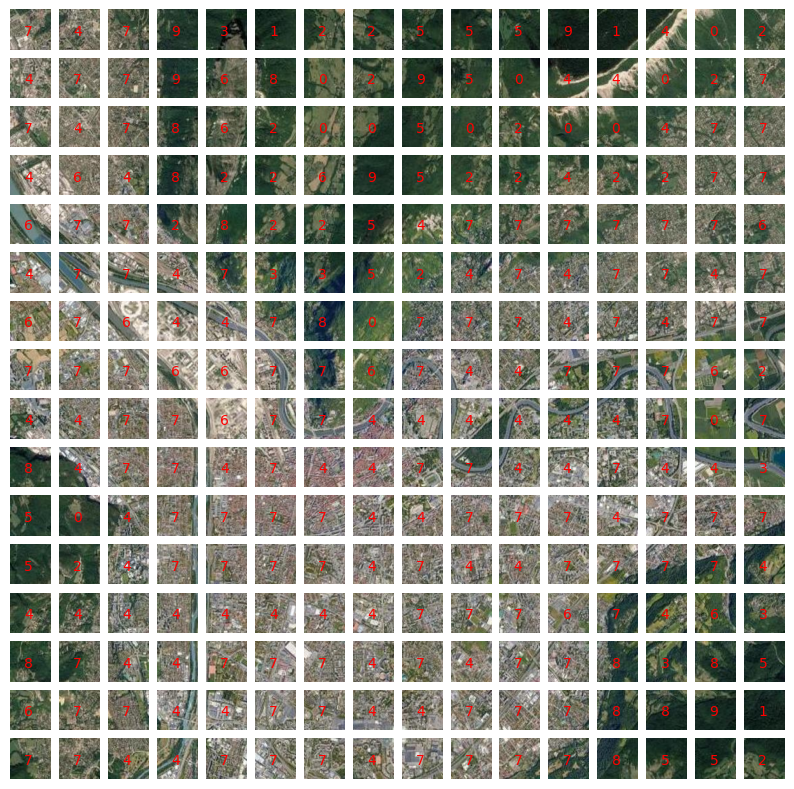

In [88]:
plot_classified_images(X_new, y_pred_class)

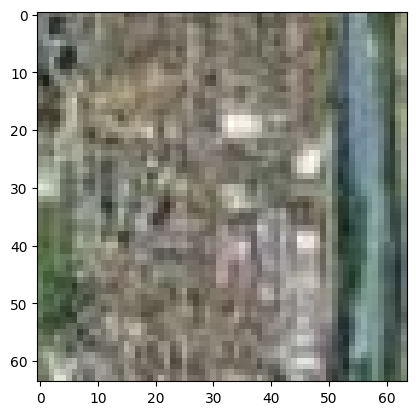

In [69]:
plt.imshow(X_reshaped[0,0]) 
#plt.imshow(X_new[0])

In [79]:
i = 1
str(i).zfill(2)

'01'